### Preprocess Data

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import py_vncorenlp
import os
from typing import Dict, Any
import json
from sklearn.model_selection import train_test_split
from typing import Dict, Union

In [18]:
df = pd.read_csv('data/Kaggle/old_data/reviews_original.csv')
final_df = df
len(df)

19870

In [19]:
def split(df, train_ratio: float = 0.8, stratify=True, label_col='label'):
    train, test = train_test_split(
        df,
        train_size = train_ratio,
        shuffle=True,
        stratify=df[label_col] if stratify else None
    )
    return train, test

In [20]:
def segment_review(segmenter, review):
    segmented_review = segmenter.word_segment(review.lower())
    return segmented_review

def segment_reviews(df):
    # Automatically download VnCoreNLP components from the original repository
    # and save them in some local machine folder
    vncorenlp_dir = 'C:/Users/ADMIN/projects/fake-review/notebooks/vncorenlp'
    
    # Create directory if it doesn't exist
    os.makedirs(vncorenlp_dir, exist_ok=True)
    
    # Check if models are already downloaded
    required_files = ['VnCoreNLP-1.2.jar', 'models/wordsegmenter/vi-vocab', 
                      'models/wordsegmenter/wordsegmenter.rdr']
    
    if not all(os.path.exists(os.path.join(vncorenlp_dir, f)) for f in required_files):
        print("Downloading VnCoreNLP models...")
        # Try downloading to current directory first, then move
        try:
            py_vncorenlp.download_model(save_dir=vncorenlp_dir)
        except:
            print("Automatic download failed. Please download manually:")
            print("1. Go to: https://github.com/vncorenlp/VnCoreNLP/releases")
            print("2. Download VnCoreNLP-1.2.jar, model folder")
            print(f"3. Place it in: {vncorenlp_dir}")
            return
    
    # Load the word and sentence segmentation component
    rdrsegmenter = py_vncorenlp.VnCoreNLP(
        annotators=["wseg"], 
        save_dir=vncorenlp_dir
    )
    
    segmented_reviews = []
    for i, row in df.iterrows():
        segmented_reviews.append(segment_review(rdrsegmenter, row['preprocessed_review'])[0])
    
    df['segmented_comment'] = segmented_reviews
    return df

In [26]:
%pwd

'C:\\Users\\ADMIN\\projects\\fake-review'

In [29]:
def mapping_typo(text: str, mapper: Dict[str, str]) -> str:
    return mapper.get(text, text)

def tokenize_words(review):
    return review.lower().split()

def preprocessing(df):
    with open('src/mapping.json', 'r', encoding='utf-8') as f:
        mapper = json.load(f)
    fixed_typo_reviews = []
    for i, row in df.iterrows():
        tokenized_review = tokenize_words(row['comment'])
        tokenized_review = [mapping_typo(t, mapper) for t in tokenized_review]
        fixed_typo_reviews.append(' '.join(tokenized_review))
    df['fixed_typo_review'] = fixed_typo_reviews

    df['preprocessed_review'] = df['fixed_typo_review']
    segment_reviews(df)

In [30]:
preprocessing(final_df)

In [6]:
%cd ..

C:\Users\ADMIN\projects\fake-review\notebooks


In [31]:
final_df.head(10)

,link,rating,comment,label,spam_label,fixed_typo_review,preprocessed_review,segmented_comment
0,https://shopee.vn/Ví-nam-đựng-Card-Feasty-da-n...,5,Tuyệt vời cho các e bé nghe đáng kể vs anh đi ...,1,3,tuyệt vời cho các em bé nghe đáng kể với anh đ...,tuyệt vời cho các em bé nghe đáng kể với anh đ...,tuyệt_vời cho các em bé nghe đáng_kể với anh đ...
1,https://shopee.vn/Ví-nam-đựng-Card-Feasty-da-n...,5,Chiến dịch tiêm vaccine Covid-19 toàn dân bắt ...,1,3,chiến dịch tiêm vaccine covid-19 toàn dân bắt ...,chiến dịch tiêm vaccine covid-19 toàn dân bắt ...,chiến_dịch tiêm vaccine covid-19 toàn dân bắt_...
2,https://shopee.vn/Ví-nam-đựng-Card-Feasty-da-n...,5,Nsnwnwnxnwkkxmmxmsmwmsmsxnndnwnxnsnwnznn ncn1m...,1,3,nsnwnwnxnwkkxmmxmsmwmsmsxnndnwnxnsnwnznn ncn1m...,nsnwnwnxnwkkxmmxmsmwmsmsxnndnwnxnsnwnznn ncn1m...,nsnwnwnxnwkkxmmxmsmwmsmsxnndnwnxnsnwnznn ncn1m...
3,https://shopee.vn/Ví-nam-đựng-Card-Feasty-da-n...,2,"Chất lượng sản phẩm ko như quảng cáo, kich thu...",0,0,"chất lượng sản phẩm không như quảng cáo, kích ...","chất lượng sản phẩm không như quảng cáo, kích ...","chất_lượng sản_phẩm không như quảng_cáo , kích..."
4,https://shopee.vn/Ví-nam-đựng-Card-Feasty-da-n...,5,"Giao hàng nhanh. Shop đóng gói cẩn thận, thế n...",0,0,"giao hàng nhanh. shop đóng gói cẩn thận, thế n...","giao hàng nhanh. shop đóng gói cẩn thận, thế n...","giao hàng nhanh . shop đóng_gói cẩn_thận , thế..."
5,https://shopee.vn/Ví-nam-đựng-Card-Feasty-da-n...,5,"Săn được sale nên rẻ, ví nhỏ gọn xinh xắn, có ...",0,0,"săn được sale nên rẻ, ví nhỏ gọn xinh xắn, có ...","săn được sale nên rẻ, ví nhỏ gọn xinh xắn, có ...","săn được sale nên rẻ , ví nhỏ gọn xinh_xắn , c..."
6,https://shopee.vn/Ví-nam-đựng-Card-Feasty-da-n...,5,Ví hơi bị đẹp luôn ạ..thời gian giao hàng rất ...,0,0,ví hơi bị đẹp luôn ạ..thời gian giao hàng rất ...,ví hơi bị đẹp luôn ạ..thời gian giao hàng rất ...,ví hơi bị đẹp luôn ạ .. thời_gian giao hàng rấ...
7,https://shopee.vn/Ví-nam-đựng-Card-Feasty-da-n...,5,"Da tốt nhưng hơi mỏng, nên mua nhé gạuckakkcka...",1,3,"da tốt nhưng hơi mỏng, nên mua nhé gạuckakkcka...","da tốt nhưng hơi mỏng, nên mua nhé gạuckakkcka...","da tốt nhưng hơi mỏng , nên mua nhé gạuckakkck..."
8,https://shopee.vn/Ví-nam-đựng-Card-Feasty-da-n...,5,Sp chat lương phu hop gia tien,0,0,sản phẩm chất lượng phù hợp giá tiền,sản phẩm chất lượng phù hợp giá tiền,sản_phẩm chất_lượng phù_hợp giá tiền
9,https://shopee.vn/Ví-nam-đựng-Card-Feasty-da-n...,5,"Sản phẩm rất xinh đẹp tuyệt vời, tôi không thể...",1,1,"sản phẩm rất xinh đẹp tuyệt vời, tôi không thể...","sản phẩm rất xinh đẹp tuyệt vời, tôi không thể...","sản_phẩm rất xinh_đẹp tuyệt_vời , tôi không_th..."


In [9]:
def build_corpus(df):
    corpus = {}
    for i, row in df.iterrows():
        tokenized_review = tokenize_words(row['segmented_comment'])
        for w in tokenized_review:
            if w not in corpus:
                corpus[w] = 1
            else:
                corpus[w] += 1
    return corpus

In [10]:
corpus = build_corpus(final_df)

In [11]:
print(len(corpus.keys()))

22511


In [4]:
df = pd.read_csv('../data/Kaggle/old_data/test.csv')
df.head(5)

,rating,comment,label,spam_label
0,5,[QC] Lo lắng khi hết data? MobiFone tặng bạn 1...,1,3
1,5,cát khá thơm\nnhà mình nuôi 6 bé mà k bị thúi ...,0,0
2,5,Cũng tạm ổn hahaaa món nào mua của shop thấy c...,0,0
3,5,"Nước tẩy trang quốc dân, giá rẻ, chất lượng tố...",0,0
4,5,"Cảm ơn shop va shopee nhiều nha, mịnh da nhan ...",0,0


In [56]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from pathlib import Path
import json
import os

def plot_first_50_tokens(corpus):
    """
    Plots the frequency of the top 50 most frequent tokens.
    """
    tokens = corpus.items()

    if not tokens:
        print("Corpus is empty.")
        return

    # Sort by frequency (descending) and take first 50
    sorted_tokens = sorted(tokens, key=lambda x: x[1], reverse=True)[:50]

    labels, values = [k for k, v in sorted_tokens], [v for k, v in sorted_tokens]

    plt.figure(figsize=(12, 6))
    plt.bar(labels, values, color='skyblue')
    plt.xlabel('Tokens')
    plt.ylabel('Frequency')
    plt.title('Top 50 Most Frequent Tokens')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

def plot_last_50_tokens(corpus):
    """
    Plots the frequency of the 50 least frequent tokens.
    """
    tokens = corpus.items()

    if not tokens:
        print("Corpus is empty.")
        return

    # Sort by frequency (ascending) and take first 50
    sorted_tokens = sorted(tokens, key=lambda x: x[1], reverse=False)[:50]

    labels, values = [k for k, v in sorted_tokens], [v for k, v in sorted_tokens]

    plt.figure(figsize=(12, 6))
    plt.bar(labels, values, color='salmon')
    plt.xlabel('Tokens')
    plt.ylabel('Frequency')
    plt.title('50 Least Frequent Tokens')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

def plot_wordcloud_from_dict(word_freq_dict):
    """
    Generates a WordCloud using a pre-calculated frequency dictionary.
    """
    if not word_freq_dict:
        print("Dictionary is empty.")
        return

    wc = WordCloud(width=800, height=400, background_color='white')
    wc.generate_from_frequencies(word_freq_dict)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title('WordCloud from Frequency Dictionary')
    plt.show()

def plots(corpus_path: Path = None) -> None:
    if not corpus_path:
        raise ValueError("Corpus path must be provided.")
    if not os.path.exists(corpus_path):
        raise ValueError("Corpus path does not exist.")

    with open(corpus_path, 'r', encoding='utf-8') as f:
        my_corpus_dict = json.load(f)

    plot_first_50_tokens(my_corpus_dict)
    plot_last_50_tokens(my_corpus_dict)
    plot_wordcloud_from_dict(my_corpus_dict)

In [57]:
%pwd
%cd C:\\Users\\ADMIN\\projects\\fake-review
%pwd

C:\Users\ADMIN\projects\fake-review


'C:\\Users\\ADMIN\\projects\\fake-review'

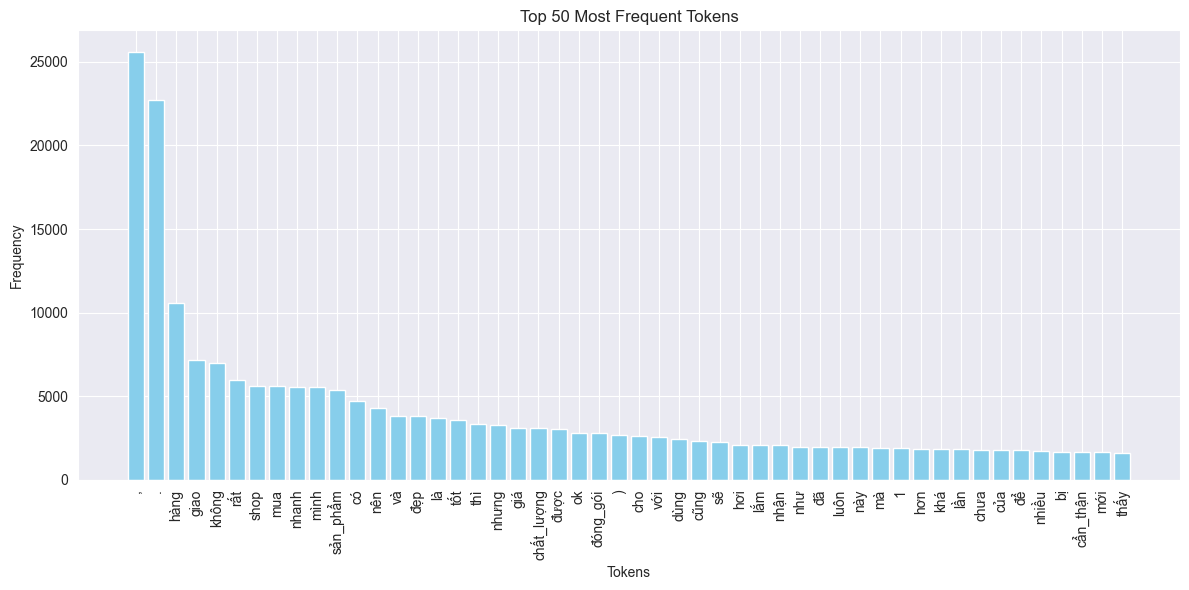

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_27576\548833709.py:53: UserWarning: Glyph 62283 (\uf34b) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_27576\548833709.py:53: UserWarning: Glyph 63866 (\N{CJK COMPATIBILITY IDEOGRAPH-F97A}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_27576\548833709.py:53: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_27576\548833709.py:53: UserWarning: Glyph 62989 (\uf60d) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_27576\548833709.py:53: UserWarning: Glyph 63856 (\N{CJK COMPATIBILITY IDEOGRAPH-F970}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_27576\548833709.py:53: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommo

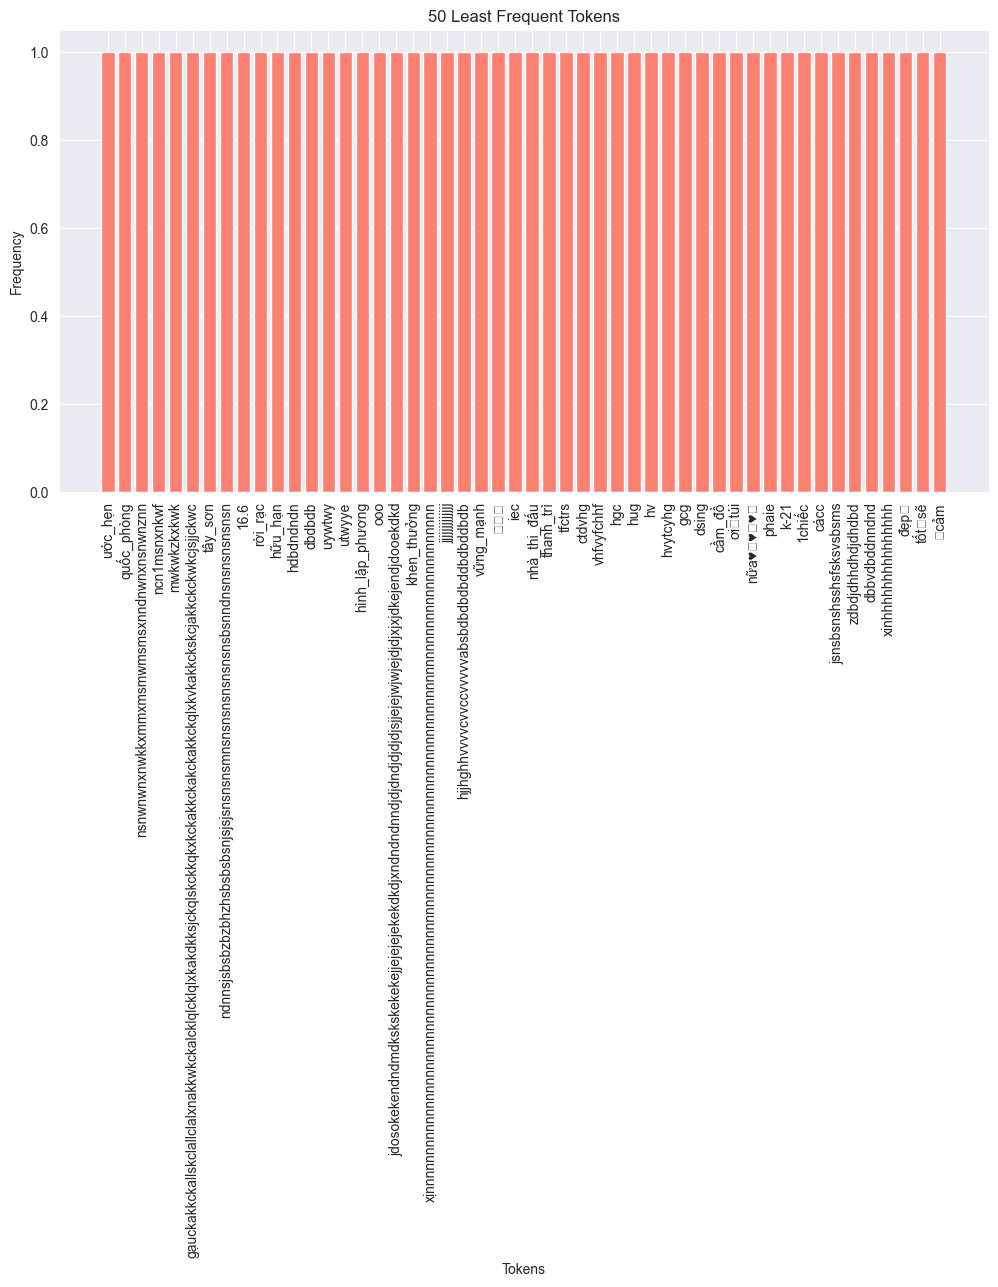

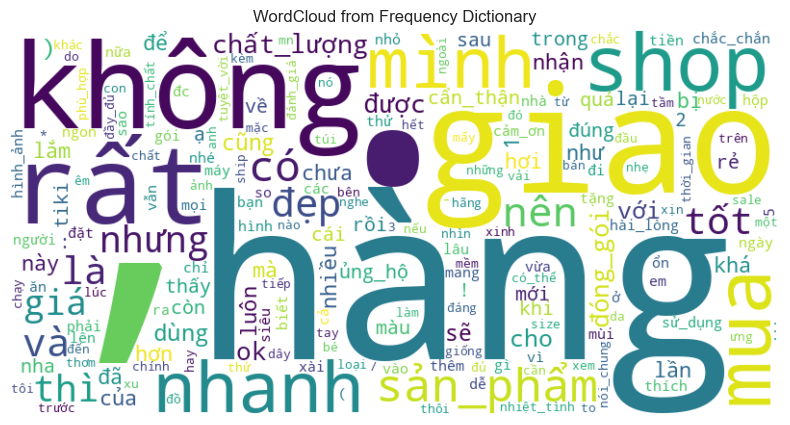

In [58]:

plots(Path('src/dataset/data/imbalance/corpus.json'))